In [1]:
#Imports Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading the data
training_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")

In [3]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
testing_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
training_data.shape

(891, 12)

In [6]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
testing_data.shape

(418, 11)

In [8]:
#check the number of missing values in each column
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
testing_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Text(0.5, 1.0, 'Missing values for Training')

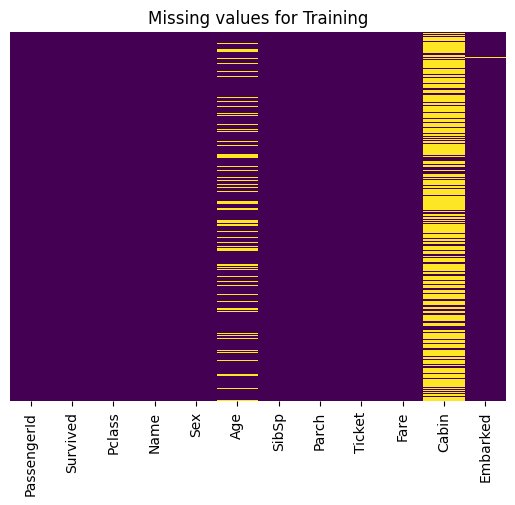

In [10]:
#using this method to  check the missing values using figure
sns.heatmap(training_data.isnull(),yticklabels=False , cbar= False, cmap='viridis')
plt.title("Missing values for Training")
#yellow means missing values

Text(0.5, 1.0, 'Missing values for Testing')

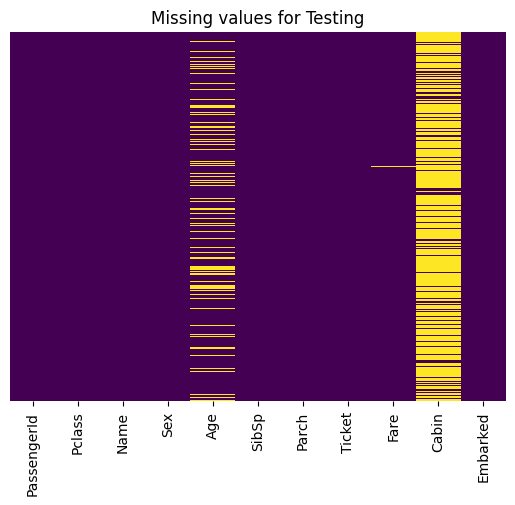

In [11]:
sns.heatmap(testing_data.isnull(),yticklabels=False , cbar= False, cmap='viridis')
plt.title("Missing values for Testing")

In [12]:
#since we have a lot of missing values in cabin and if we fill it maybe it will affect badly on the reuslt so we should ignore this column and drop it
training_data = training_data.drop(columns=["Cabin","PassengerId"] , axis= 1)
testing_data = testing_data.drop(columns=["Cabin","PassengerId"], axis=1)

In [13]:
training_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
testing_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<Axes: ylabel='Frequency'>

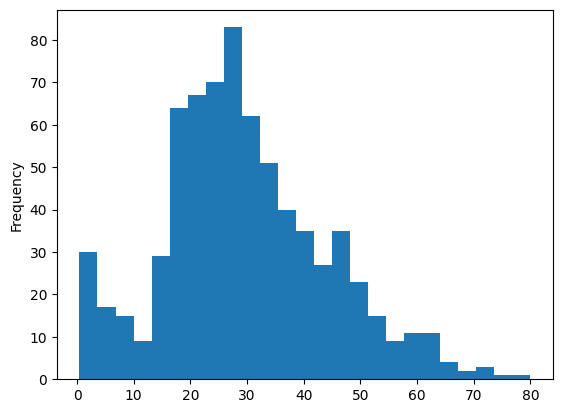

In [15]:
training_data['Age'].plot.hist(bins=25)

In [16]:
#replacing the Age columns values with the mean
training_data["Age"].fillna(training_data["Age"].mean(),inplace=True)
testing_data["Age"].fillna(testing_data["Age"].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2908\1307783333.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  testing_data["Age"].fillna(testing_data["Age"].mean(), inplace=True)


In [17]:
# finding the mode value of Embarked column
print(training_data["Embarked"].mode())


0    S
Name: Embarked, dtype: object


In [18]:
print(training_data["Embarked"].mode()[0])

S


In [19]:
# Replacing the missing values of Embarled column with mode value --> S or 0
training_data["Embarked"].fillna(training_data["Embarked"].mode()[0] , inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2908\1446705454.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_data["Embarked"].fillna(training_data["Embarked"].mode()[0] , inplace=True)


In [20]:
# Fill missing Fare values in testing data with the mean
testing_data["Fare"].fillna(testing_data["Fare"].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2908\755876185.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  testing_data["Fare"].fillna(testing_data["Fare"].mean(), inplace=True)


In [21]:
#Get a count of the number of survivors
# 0-->not Survived     and 1-->Survived
training_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [22]:
#so we can see that more than the half of passengers dead
# Now we wanna check again if there any missing value in our data
training_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Text(0.5, 1.0, 'Missing values for training dataset')

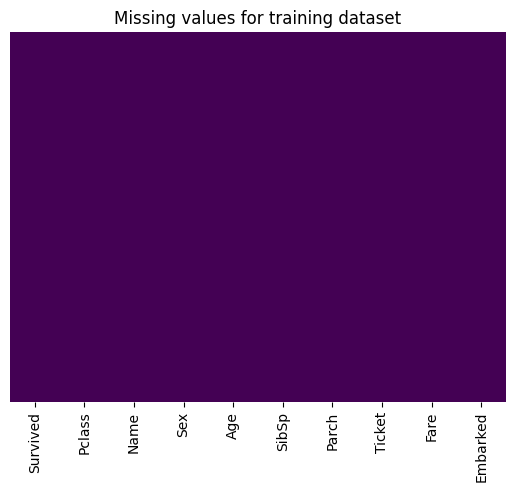

In [23]:
sns.heatmap(training_data.isnull(),yticklabels=False , cbar= False, cmap='viridis')
plt.title("Missing values for training dataset")

In [24]:
testing_data.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Text(0.5, 1.0, 'Missing values for testing dataset')

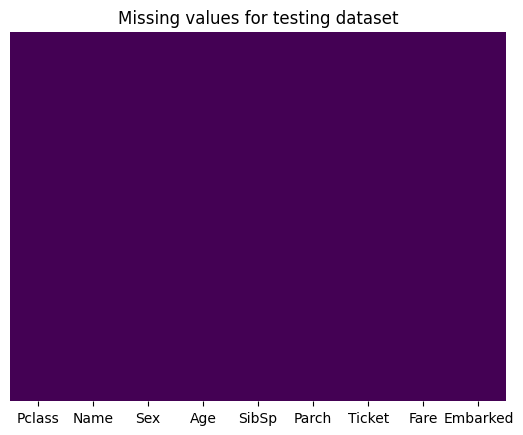

In [25]:
sns.heatmap(testing_data.isnull(),yticklabels=False , cbar= False, cmap='viridis')
plt.title("Missing values for testing dataset")

In [26]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

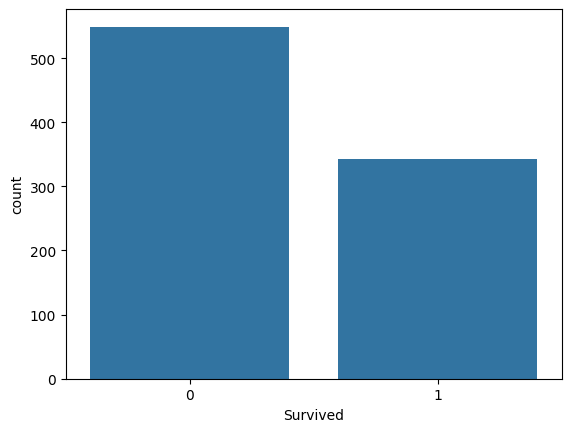

In [27]:
#Now we have no missing values but they are not same type yet
#Data visualization
# making a count plot for Survived column
sns.countplot(x='Survived', data=training_data)

In [28]:
training_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

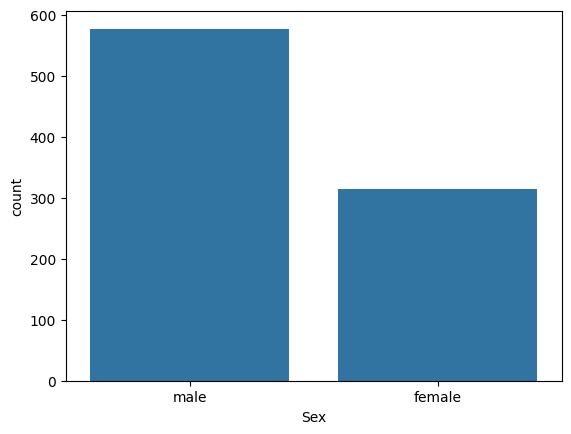

In [29]:
sns.countplot(x='Sex', data=training_data)

Text(0.5, 1.0, 'Survival by Sex')

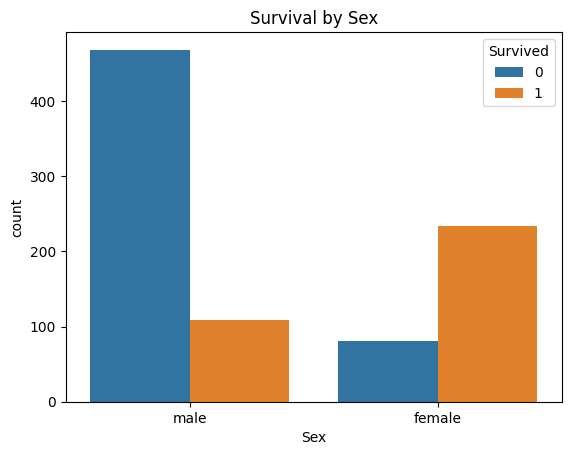

In [30]:
# as we see before the males are more than females but we don't know how many of each geneder is survived
# we need to know each gender how many of them survived
sns.countplot(x='Sex' , hue='Survived' , data = training_data)
plt.title('Survival by Sex')


<Axes: xlabel='Pclass', ylabel='count'>

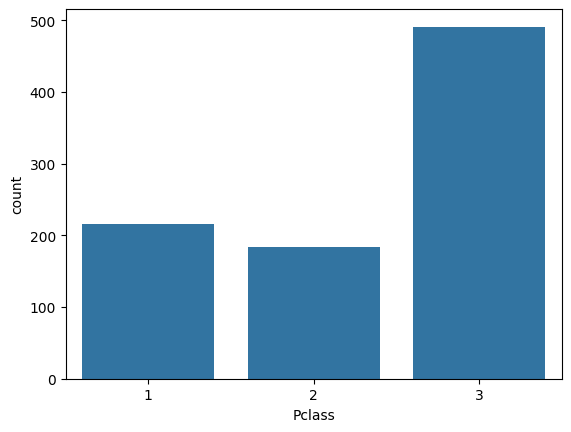

In [31]:
# as we see number of females survived more than males
# okay now we want to see the Pclass column
sns.countplot(x='Pclass' , data = training_data)

<Axes: xlabel='Pclass', ylabel='count'>

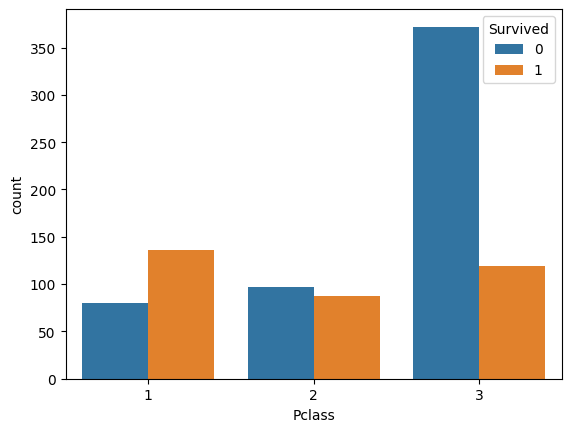

In [32]:
# we need to know each Pclass how many of them survived
sns.countplot(x='Pclass' , hue='Survived' , data = training_data)

<Axes: xlabel='Embarked', ylabel='count'>

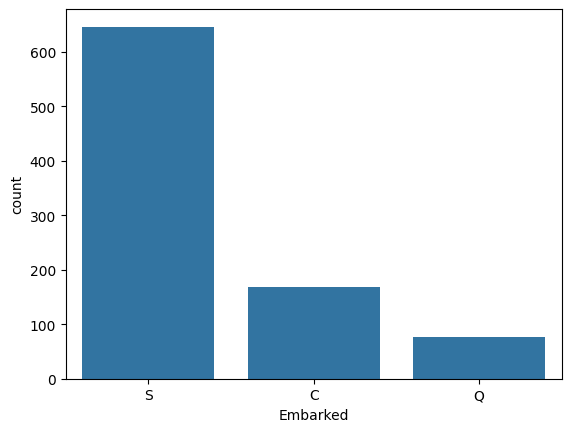

In [33]:
# okay now we want to see the Embarked column
sns.countplot(x='Embarked' , data = training_data)

<Axes: xlabel='Embarked', ylabel='count'>

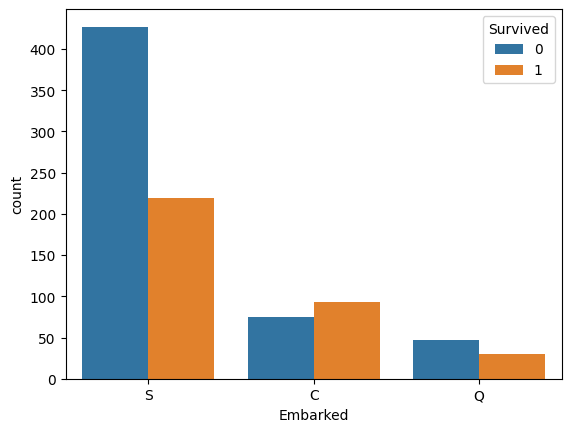

In [34]:
#we need to know each Embarked how many of them survived
sns.countplot(x='Embarked' , hue='Survived' , data = training_data)

<Axes: xlabel='SibSp', ylabel='count'>

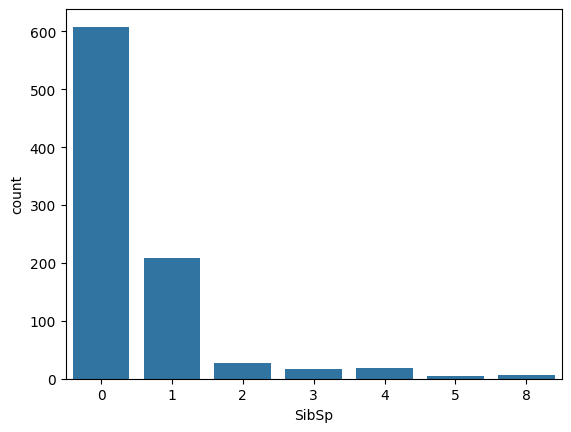

In [35]:
sns.countplot(x='SibSp' , data = training_data)


In [36]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [37]:
# Data Preprocessing
# Encode categorical features (Sex and Embarked)
# Using pandas get_dummies for one-hot encoding
training_data = pd.get_dummies(training_data, columns =['Sex', 'Embarked'], drop_first=True)
testing_data = pd.get_dummies(testing_data , columns =['Sex', 'Embarked'], drop_first=True)

In [38]:
training_data["Name"].values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [39]:
# Feature Engineering: Extract Title from Name
training_data['Title'] = training_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
testing_data['Title'] = testing_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [40]:
print(training_data['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [41]:
print(testing_data['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [42]:
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Mlle', 'Countess', 'Don', 'Lady', 'Capt', 'Mme', 'Sir', 'Jonkheer', 'Dona', 'Ms','the Countess']
training_data['Title'] = training_data['Title'].replace(rare_titles, 'Rare')
testing_data['Title'] = testing_data['Title'].replace(rare_titles, 'Rare')

In [43]:
print(training_data['Title'].unique())
print(testing_data['Title'].unique())


['Mr' 'Mrs' 'Miss' 'Master' 'Rare']
['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


In [44]:
print(training_data['Title'].value_counts())
print(
)
print(testing_data['Title'].value_counts())


Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64

Title
Mr        240
Miss       78
Mrs        72
Master     21
Rare        7
Name: count, dtype: int64


In [45]:
# Map titles to numerical values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
training_data['Title'] = training_data['Title'].map(title_mapping)
testing_data['Title'] = testing_data['Title'].map(title_mapping)

In [46]:
training_data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [47]:
# Drop Name and Ticket columns as they are no longer needed
training_data = training_data.drop(['Name', 'Ticket'], axis=1)
testing_data = testing_data.drop(['Name', 'Ticket'], axis=1)

In [48]:
training_data['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [49]:
# Bin Age into groups
training_data['AgeGroup'] = pd.cut(training_data['Age'], bins=[0, 12, 18, 60, np.inf], labels=[0, 1, 2, 3])
testing_data['AgeGroup'] = pd.cut(testing_data['Age'], bins=[0, 12, 18, 60, np.inf], labels=[0, 1, 2, 3])
# Convert AgeGroup to numerical
training_data['AgeGroup'] = training_data['AgeGroup'].astype(int)
testing_data['AgeGroup'] = testing_data['AgeGroup'].astype(int)

In [50]:
#Drop Age group because we don't need it anymore
training_data = training_data.drop('Age', axis=1)
testing_data = testing_data.drop('Age', axis=1)

In [51]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    bool   
 6   Embarked_Q  891 non-null    bool   
 7   Embarked_S  891 non-null    bool   
 8   Title       891 non-null    int64  
 9   AgeGroup    891 non-null    int64  
dtypes: bool(3), float64(1), int64(6)
memory usage: 51.5 KB


In [52]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        418 non-null    float64
 4   Sex_male    418 non-null    bool   
 5   Embarked_Q  418 non-null    bool   
 6   Embarked_S  418 non-null    bool   
 7   Title       418 non-null    int64  
 8   AgeGroup    418 non-null    int64  
dtypes: bool(3), float64(1), int64(5)
memory usage: 20.9 KB


In [53]:
training_data.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title,AgeGroup
0,0,3,1,0,7.2500,True,False,True,1,2
1,1,1,1,0,71.2833,False,False,False,3,2
2,1,3,0,0,7.9250,False,False,True,2,2
3,1,1,1,0,53.1000,False,False,True,3,2
4,0,3,0,0,8.0500,True,False,True,1,2


In [54]:
testing_data.head()

,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title,AgeGroup
0,3,0,0,7.8292,True,True,False,1,2
1,3,1,0,7.0000,False,False,True,3,2
2,2,0,0,9.6875,True,True,False,1,3
3,3,0,0,8.6625,True,False,True,1,2
4,3,1,1,12.2875,False,False,True,3,2


In [55]:
#data split

X_train_full = training_data.drop('Survived', axis=1)
y_train_full = training_data['Survived']

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  

from sklearn.model_selection import cross_val_score

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


In [57]:
models = {
"LogisticRegression" : LogisticRegression(max_iter=1000),
"Random Foreset" : RandomForestClassifier(random_state=42),
"XGBoost" : XGBClassifier(use_label_encoder =False , eval_matric ="logloss", random_state =42)
}

for name ,model in models.items():
    scores = cross_val_score(model , X_train_full , y_train_full , cv = 5 , scoring='accuracy')
    print(f"{name} - Mean CV Accuracy: {scores.mean():.4f}")


LogisticRegression - Mean CV Accuracy: 0.8036
Random Foreset - Mean CV Accuracy: 0.8160


c:\Users\HP\Desktop\Ai Engineer\Machine Learning\Ex 1\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:59:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_matric", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HP\Desktop\Ai Engineer\Machine Learning\Ex 1\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:59:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_matric", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HP\Desktop\Ai Engineer\Machine Learning\Ex 1\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:59:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_matric", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HP\Desktop\Ai Engineer\Machine Learning\Ex 1\venv\Lib\site-packages\xgboo

XGBoost - Mean CV Accuracy: 0.8283


c:\Users\HP\Desktop\Ai Engineer\Machine Learning\Ex 1\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:59:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_matric", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
#LogisticRegression - Mean CV Accuracy: 0.8036

#Random Foreset - Mean CV Accuracy: 0.8160

#XGBoost - Mean CV Accuracy: 0.8283


# so the best one so far is XGBoost

In [58]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Validation Accuracy: 0.8379888268156425
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



c:\Users\HP\Desktop\Ai Engineer\Machine Learning\Ex 1\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:06:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


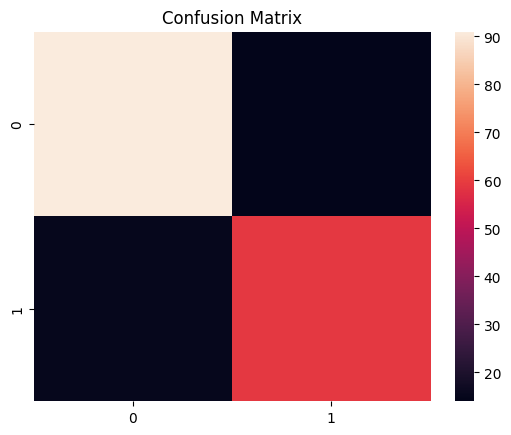

In [60]:
sns.heatmap(confusion_matrix(y_val, y_pred))
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_full, y_train_full)


c:\Users\HP\Desktop\Ai Engineer\Machine Learning\Ex 1\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:07:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HP\Desktop\Ai Engineer\Machine Learning\Ex 1\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:07:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HP\Desktop\Ai Engineer\Machine Learning\Ex 1\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:07:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HP\Desktop\Ai Engineer\Machine Learning\Ex 1\venv\Lib\site

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.832803967108154


c:\Users\HP\Desktop\Ai Engineer\Machine Learning\Ex 1\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:07:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [62]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.832803967108154


Validation Accuracy : 0.9106145251396648
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       105
           1       0.89      0.89      0.89        74

    accuracy                           0.91       179
   macro avg       0.91      0.91      0.91       179
weighted avg       0.91      0.91      0.91       179



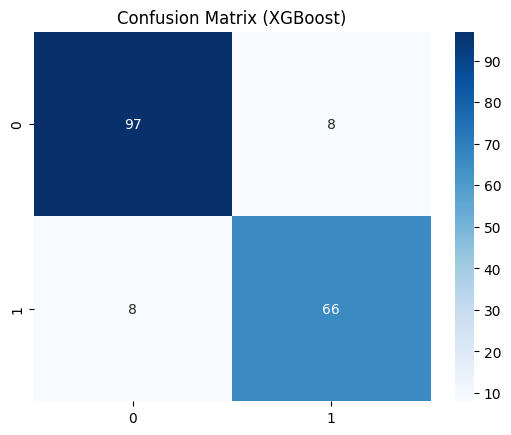

In [67]:
best_model = grid_search.best_estimator_

y_val_pred = best_model.predict(X_val)
print("Validation Accuracy :", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, cmap='Blues')
plt.title("Confusion Matrix (XGBoost)")
plt.show()

In [68]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_val_pred)
tn, fp, fn, tp = cm.ravel()

specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)  

print("Specificity:", round(specificity, 4))
print("Sensitivity (Recall):", round(sensitivity, 4))


Specificity: 0.9238
Sensitivity (Recall): 0.8919


In [70]:
#Finally test

final_predictions = best_model.predict(testing_data)

# Reload PassengerId for submission
original_test = pd.read_csv("test.csv")

# Create submission file
submission = pd.DataFrame({
    "PassengerId": original_test["PassengerId"],
    "Survived": final_predictions.astype(int)
})
# Save it
submission.to_csv("submission.csv", index=False)
print("✅ Submission file saved using the best model from GridSearchCV!")


✅ Submission file saved using the best model from GridSearchCV!
